## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  59.608713  1349.875211  0.914248   7.762171  1235.542180
1  34.074045  1479.930362  0.092812   7.105243   141.398969
2  31.233749   833.042096  0.365381   5.052848   306.013263
3  27.939808   961.394268  0.729413  10.984855   701.895003
4  78.603767  1426.607988  0.426644   1.557452   613.677521


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0259200	total: 58ms	remaining: 57.9s
1:	learn: 1.0145624	total: 58.6ms	remaining: 29.2s
2:	learn: 1.0023530	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9899505	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9766647	total: 60.1ms	remaining: 12s
5:	learn: 0.9653029	total: 60.6ms	remaining: 10s
6:	learn: 0.9538855	total: 61.1ms	remaining: 8.67s
7:	learn: 0.9421268	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9293478	total: 62.1ms	remaining: 6.84s
9:	learn: 0.9170198	total: 62.7ms	remaining: 6.21s
10:	learn: 0.9060199	total: 63.2ms	remaining: 5.68s
11:	learn: 0.8918748	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8794254	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8669004	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8540463	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8435355	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8315617	total: 66.2ms	remaining: 3.83s
17:	learn: 0.8207250	total: 66.5ms	remaining: 3.63s
18:	learn: 0.8130602	total: 66.9ms	remaining: 3.45

114:	learn: 0.2634602	total: 108ms	remaining: 834ms
115:	learn: 0.2609480	total: 109ms	remaining: 829ms
116:	learn: 0.2580469	total: 109ms	remaining: 824ms
117:	learn: 0.2558174	total: 110ms	remaining: 820ms
118:	learn: 0.2531657	total: 110ms	remaining: 816ms
119:	learn: 0.2501620	total: 111ms	remaining: 811ms
120:	learn: 0.2468075	total: 111ms	remaining: 806ms
121:	learn: 0.2449351	total: 111ms	remaining: 801ms
122:	learn: 0.2425125	total: 112ms	remaining: 796ms
123:	learn: 0.2403360	total: 112ms	remaining: 792ms
124:	learn: 0.2372921	total: 113ms	remaining: 788ms
125:	learn: 0.2353366	total: 113ms	remaining: 784ms
126:	learn: 0.2333388	total: 113ms	remaining: 779ms
127:	learn: 0.2316254	total: 114ms	remaining: 775ms
128:	learn: 0.2294310	total: 114ms	remaining: 771ms
129:	learn: 0.2278437	total: 115ms	remaining: 767ms
130:	learn: 0.2253222	total: 115ms	remaining: 763ms
131:	learn: 0.2239592	total: 115ms	remaining: 759ms
132:	learn: 0.2220588	total: 116ms	remaining: 756ms
133:	learn: 

294:	learn: 0.0815008	total: 186ms	remaining: 444ms
295:	learn: 0.0813312	total: 186ms	remaining: 443ms
296:	learn: 0.0810597	total: 187ms	remaining: 442ms
297:	learn: 0.0808900	total: 187ms	remaining: 442ms
298:	learn: 0.0807048	total: 188ms	remaining: 440ms
299:	learn: 0.0805172	total: 188ms	remaining: 439ms
300:	learn: 0.0799241	total: 189ms	remaining: 438ms
301:	learn: 0.0797661	total: 189ms	remaining: 437ms
302:	learn: 0.0791872	total: 190ms	remaining: 436ms
303:	learn: 0.0790048	total: 190ms	remaining: 435ms
304:	learn: 0.0788302	total: 190ms	remaining: 434ms
305:	learn: 0.0782361	total: 191ms	remaining: 433ms
306:	learn: 0.0780552	total: 191ms	remaining: 432ms
307:	learn: 0.0774866	total: 192ms	remaining: 430ms
308:	learn: 0.0769614	total: 192ms	remaining: 429ms
309:	learn: 0.0764482	total: 192ms	remaining: 428ms
310:	learn: 0.0762821	total: 193ms	remaining: 427ms
311:	learn: 0.0757721	total: 193ms	remaining: 426ms
312:	learn: 0.0756307	total: 193ms	remaining: 425ms
313:	learn: 

526:	learn: 0.0365617	total: 290ms	remaining: 260ms
527:	learn: 0.0363478	total: 291ms	remaining: 260ms
528:	learn: 0.0363149	total: 291ms	remaining: 259ms
529:	learn: 0.0361148	total: 292ms	remaining: 259ms
530:	learn: 0.0360255	total: 292ms	remaining: 258ms
531:	learn: 0.0359289	total: 292ms	remaining: 257ms
532:	learn: 0.0357262	total: 293ms	remaining: 257ms
533:	learn: 0.0356395	total: 293ms	remaining: 256ms
534:	learn: 0.0356107	total: 294ms	remaining: 255ms
535:	learn: 0.0354083	total: 294ms	remaining: 255ms
536:	learn: 0.0353241	total: 295ms	remaining: 254ms
537:	learn: 0.0352960	total: 295ms	remaining: 254ms
538:	learn: 0.0351002	total: 296ms	remaining: 253ms
539:	learn: 0.0350182	total: 296ms	remaining: 252ms
540:	learn: 0.0349466	total: 297ms	remaining: 252ms
541:	learn: 0.0347563	total: 297ms	remaining: 251ms
542:	learn: 0.0346769	total: 298ms	remaining: 251ms
543:	learn: 0.0345653	total: 298ms	remaining: 250ms
544:	learn: 0.0344874	total: 299ms	remaining: 249ms
545:	learn: 

701:	learn: 0.0185623	total: 368ms	remaining: 156ms
702:	learn: 0.0184446	total: 368ms	remaining: 156ms
703:	learn: 0.0183298	total: 369ms	remaining: 155ms
704:	learn: 0.0182179	total: 369ms	remaining: 155ms
705:	learn: 0.0181148	total: 370ms	remaining: 154ms
706:	learn: 0.0180214	total: 370ms	remaining: 153ms
707:	learn: 0.0179389	total: 371ms	remaining: 153ms
708:	learn: 0.0178485	total: 371ms	remaining: 152ms
709:	learn: 0.0177516	total: 371ms	remaining: 152ms
710:	learn: 0.0176463	total: 372ms	remaining: 151ms
711:	learn: 0.0175597	total: 372ms	remaining: 150ms
712:	learn: 0.0174753	total: 373ms	remaining: 150ms
713:	learn: 0.0173714	total: 373ms	remaining: 149ms
714:	learn: 0.0172979	total: 373ms	remaining: 149ms
715:	learn: 0.0172147	total: 374ms	remaining: 148ms
716:	learn: 0.0171388	total: 374ms	remaining: 148ms
717:	learn: 0.0170393	total: 375ms	remaining: 147ms
718:	learn: 0.0169358	total: 375ms	remaining: 147ms
719:	learn: 0.0168469	total: 376ms	remaining: 146ms
720:	learn: 

944:	learn: 0.0078083	total: 472ms	remaining: 27.5ms
945:	learn: 0.0077936	total: 473ms	remaining: 27ms
946:	learn: 0.0077895	total: 473ms	remaining: 26.5ms
947:	learn: 0.0077728	total: 474ms	remaining: 26ms
948:	learn: 0.0077541	total: 474ms	remaining: 25.5ms
949:	learn: 0.0077358	total: 475ms	remaining: 25ms
950:	learn: 0.0077213	total: 475ms	remaining: 24.5ms
951:	learn: 0.0077068	total: 476ms	remaining: 24ms
952:	learn: 0.0076927	total: 476ms	remaining: 23.5ms
953:	learn: 0.0076747	total: 477ms	remaining: 23ms
954:	learn: 0.0076577	total: 477ms	remaining: 22.5ms
955:	learn: 0.0076416	total: 477ms	remaining: 22ms
956:	learn: 0.0076278	total: 478ms	remaining: 21.5ms
957:	learn: 0.0076082	total: 478ms	remaining: 21ms
958:	learn: 0.0075905	total: 479ms	remaining: 20.5ms
959:	learn: 0.0075581	total: 480ms	remaining: 20ms
960:	learn: 0.0075415	total: 480ms	remaining: 19.5ms
961:	learn: 0.0075241	total: 480ms	remaining: 19ms
962:	learn: 0.0075051	total: 481ms	remaining: 18.5ms
963:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

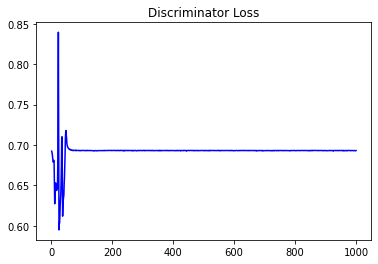

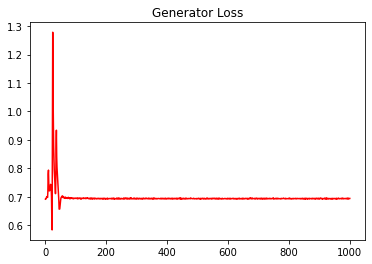

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.01315197108661636


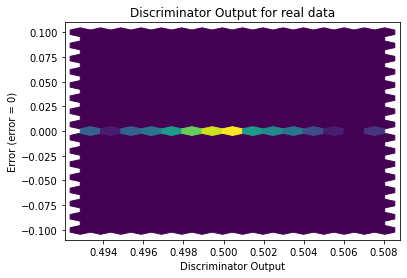

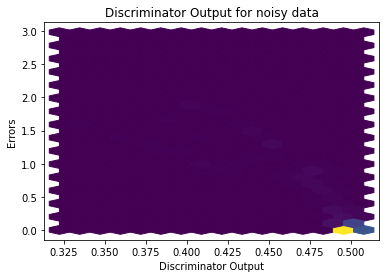

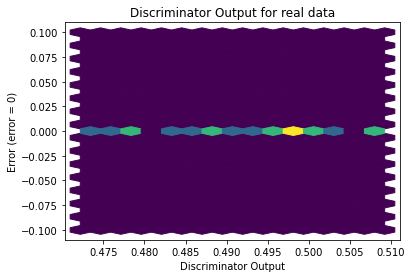

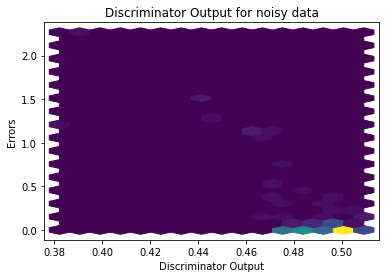

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


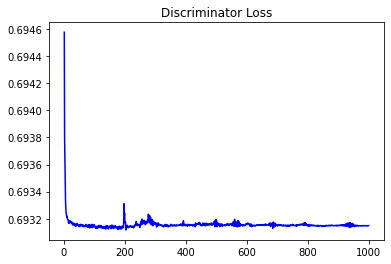

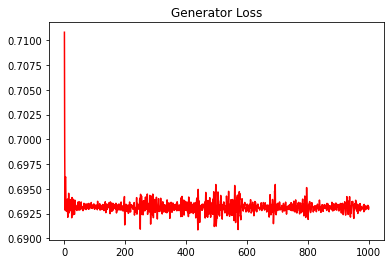

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0057120051440234495


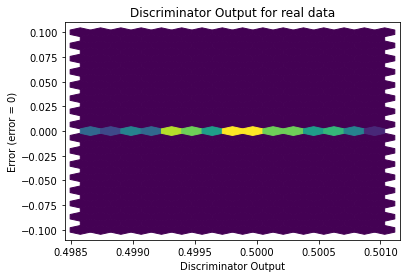

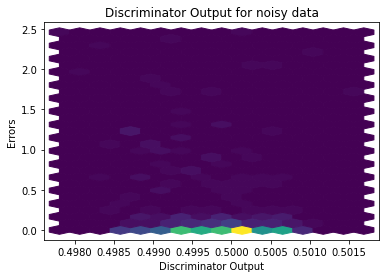

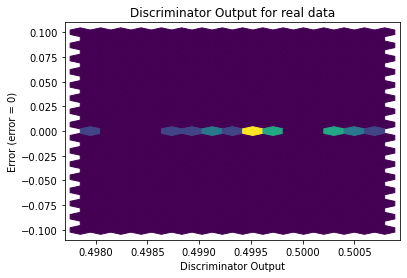

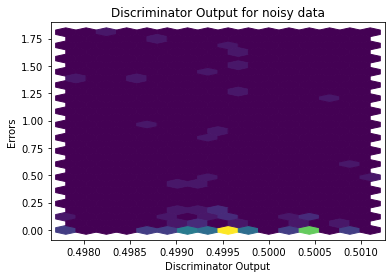

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0333]], requires_grad=True)
